In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [4]:
data = pd.read_csv('data.csv')
data.head()

,SEQN,WTDRD1,WTDR2D,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,...,URXUTL,URDUTLLC,URXUTU,URDUTULC,URXUUR,URDUURLC,URXPREG,URXUAS,LBDB12,LBDB12SI
0,-1.731380,-0.411127,-0.479918,-0.374547,0.268011,0.133435,0.403245,-0.915282,-1.210549,-0.297096,...,-3.981083e-16,-7.529568e-17,0.000000,0.000000,-9.786673e-17,-1.395170e-16,0.0,0.000000,-0.209789,-0.209821
1,-1.731039,-0.382180,-0.485066,-0.374547,0.782758,0.133435,0.403245,-1.095171,-1.694493,-0.297096,...,-3.981083e-16,-7.529568e-17,0.000000,0.000000,-9.786673e-17,-1.395170e-16,0.0,0.000000,-0.240508,-0.240427
2,-1.730699,0.774502,0.072247,-0.374547,0.268011,0.133435,0.403245,0.164051,0.725228,-0.297096,...,-3.981083e-16,-7.529568e-17,0.000000,0.000000,-9.786673e-17,-1.395170e-16,0.0,0.000000,0.166060,0.166019
3,-1.730359,3.064069,1.878599,-0.374547,0.525385,0.133435,0.403245,0.433884,-0.726605,-0.297096,...,-1.792199e+00,-1.710783e-01,0.291287,-0.844362,-2.785641e-01,-8.906037e-01,0.0,-0.486522,0.000000,0.000000
4,-1.730019,0.758155,0.064124,-0.374547,0.988657,0.133435,0.403245,0.164051,-1.694493,-0.297096,...,-3.981083e-16,-7.529568e-17,0.000000,0.000000,-9.786673e-17,-1.395170e-16,0.0,0.000000,-0.750073,-0.749953


Now that we have imported our data, we will perform PCA on it

In [5]:
pca = PCA()
data_pca = pca.fit_transform(data)

explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:\n", explained_variance_ratio)

Explained Variance Ratio:
 [5.16992577e-02 4.27256891e-02 3.53240480e-02 2.77053699e-02
 2.08877447e-02 1.52575909e-02 1.51398336e-02 1.27258919e-02
 1.02904183e-02 9.54491001e-03 9.20954277e-03 8.00415732e-03
 7.69964057e-03 7.24353320e-03 6.69555394e-03 5.91373455e-03
 5.72449435e-03 5.55271149e-03 5.47785746e-03 5.26760016e-03
 5.20287475e-03 4.99839719e-03 4.84762321e-03 4.71499251e-03
 4.64166691e-03 4.53524732e-03 4.42920448e-03 4.27273902e-03
 4.22326178e-03 4.09849736e-03 3.95355656e-03 3.87436408e-03
 3.77104793e-03 3.69732579e-03 3.67040532e-03 3.59967620e-03
 3.47760346e-03 3.44315127e-03 3.39534306e-03 3.36135821e-03
 3.30933618e-03 3.25782029e-03 3.23691667e-03 3.20958437e-03
 3.15963189e-03 3.10862223e-03 3.02490409e-03 2.97653698e-03
 2.93619385e-03 2.90121728e-03 2.85788133e-03 2.83602102e-03
 2.83230819e-03 2.80629564e-03 2.77369520e-03 2.77250145e-03
 2.73928253e-03 2.71255296e-03 2.69702862e-03 2.67956668e-03
 2.65035090e-03 2.62385346e-03 2.61077438e-03 2.59545049e-

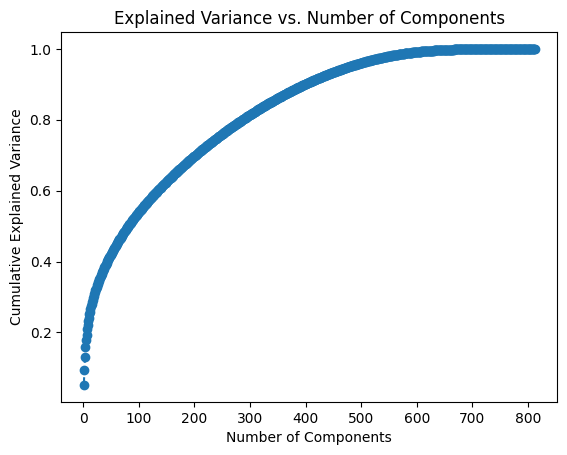

In [6]:
# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

In [8]:
threshold = 0.98
num_components = np.argmax(cumulative_variance >= threshold) + 1

# Print the result
print(f'The number of components to explain at least {threshold * 100}% variance is: {num_components}')

The number of components to explain at least 98.0% variance is: 552


I will consider the number of principal components that capture at least 98% of the total variance in the data. This choice is made to retain a high amount of information while reducing the dimensionality of the dataset. In my analysis, I observed that the cumulative explained variance reaches a plateau after a certain number of components, suggesting that additional components do not contribute significantly to the overall variance

In [9]:
def display_feature_significance(pca, features):
    pc1_weights = pca.components_[0]
    feature_weights = pd.DataFrame({'Feature': features, 'Weight': pc1_weights})
    feature_weights = feature_weights.reindex(feature_weights['Weight'].abs().sort_values(ascending=False).index)
    print(feature_weights)

# Call the function with your PCA object and original feature names
display_feature_significance(pca, data.columns)

      Feature    Weight
524     ORXGH  0.152335
525     ORXGL  0.152335
548    ORXH64  0.152335
527    ORXH11  0.152125
535    ORXH40  0.152100
..        ...       ...
200    BMILEG  0.000000
358   CSQ260M  0.000000
26   DRQSDT10  0.000000
27   DRQSDT11  0.000000
354   CSQ260D  0.000000

[812 rows x 2 columns]


Hence, the top 5 original features among these are:
1) ORXGH
2) ORXGL
3) ORXH64
4) ORXH11
5) ORXH40

With a combined weight of around 76%

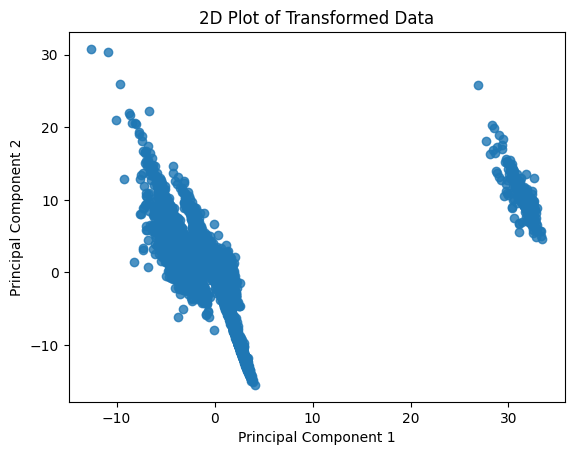

In [10]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Plot of Transformed Data')
plt.show()

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change

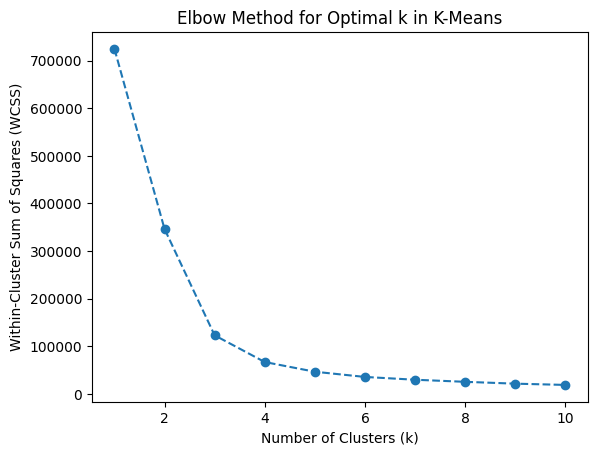

In [11]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_pca[:, :2])
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k in K-Means')
plt.show()

E:\Python\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


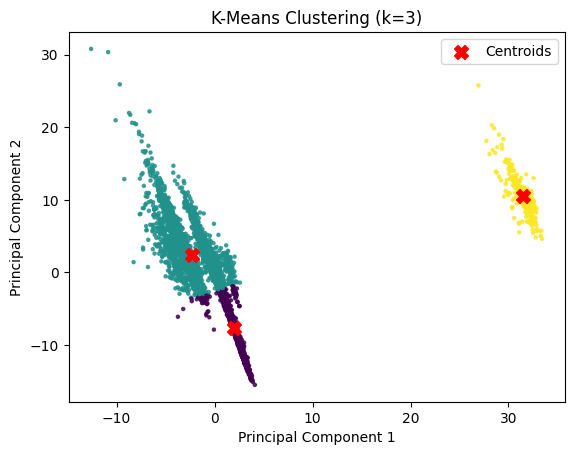

In [35]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(data_pca[:, :2])

plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.8, s=5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X', label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend()
plt.show()

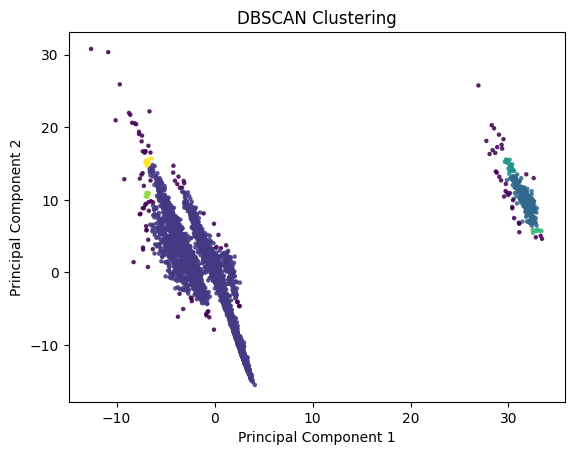

In [36]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca[:, :2])
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8, s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

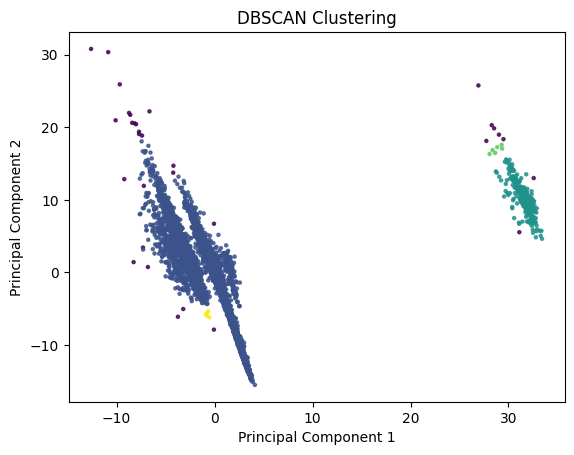

In [37]:
dbscan = DBSCAN(eps=1, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca[:, :2])
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8, s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

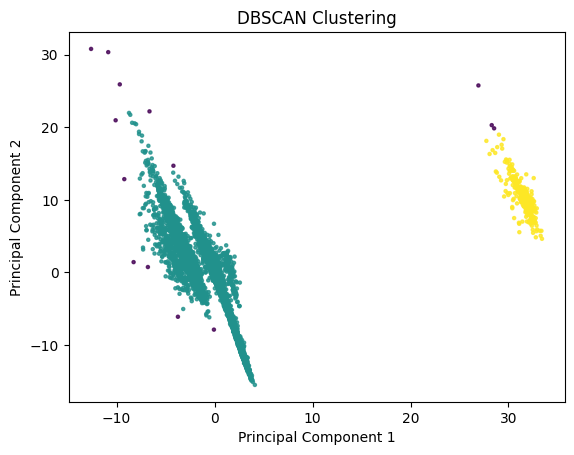

In [39]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca[:, :2])
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.8, s=5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering')
plt.show()

It can be seen visually that there are two main clusters in the graph. 
K-Means tells us that there are 3 clusters and the fromation is also not correct (visually).
While DBSCAN's clusters look more acceptable, along with the necessary outliers.